In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.19.2', 'qiskit-aer': '0.10.3', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.18.3', 'qiskit-aqua': None, 'qiskit': '0.34.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

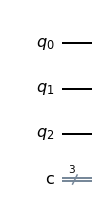

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3) # 3 qubits and 3 classical bits
qc.draw()

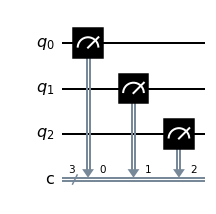

In [3]:
# measure qubits and record results
qc.measure([0,1,2], [0,1,2])
qc.draw()

In [4]:
# use quantum simulator: Aer
from qiskit.providers.aer import AerSimulator
sim = AerSimulator() # new sim object

In [5]:
job = sim.run(qc) # run experiment
result = job.result() # get results
result.get_counts() # return count dictionary

{'000': 1024}

Circuit was repeated 1024 to negate the small amount of randomness in its results

### Encoding an input
Using NOT gate to change bit values

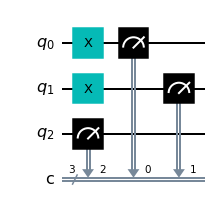

In [6]:
qc = QuantumCircuit(3, 3)
qc.x([0,1]) # use X gate / Not gate on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()

In [9]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'011': 1024}

# Adder Circuit

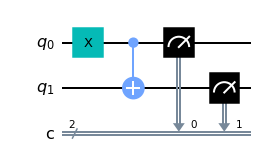

In [10]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1) # CNOT controlled by 0 and targeting 1 0 XOR 1
qc.measure([0,1], [0,1])
display(qc.draw())

In [11]:
job = sim.run(qc)
result = job.result()
result.get_counts()

{'11': 1024}

### Half Adder

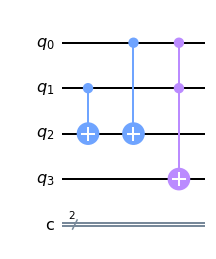

In [13]:
qc = QuantumCircuit(4, 2)
# Encoding
qc.x(0)
qc.x(1)

# Adder circuit
qc.cx(1, 2)
qc.cx(0, 2)
qc.ccx(0, 1, 3)

# Measure an
# qc.measure([0, 1, 2, 3], [0, 1])
qc.draw()